<a href="https://colab.research.google.com/github/srskhan/R-Tutorials/blob/master/inceptin_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import all the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

#### For re-sizing all the image

In [4]:
IMAGE_SIZE = [224, 224]
EPOCHS=3

In [5]:
train_path = '/content/drive/MyDrive/Dataset/ete-300/training/BangladeshiCropsSplit/train'
valid_path = '/content/drive/MyDrive/Dataset/ete-300/training/BangladeshiCropsSplit/test'
test_path = '/content/drive/MyDrive/Dataset/ete-300/training/BangladeshiCropsSplit/val'

## Using the Image Data Generator to import the images from the dataset

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10482 images belonging to 14 classes.


In [8]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1307 images belonging to 14 classes.


## Import the  Inception V3 library

In [9]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


## Not training the existing weights as pretrained model

In [10]:
for layer in inception.layers:
    layer.trainable = False

For getting number of output classes

In [14]:
folders = glob('/content/drive/MyDrive/Dataset/ete-300/training/BangladeshiCropsSplit/train/*')

In [15]:
len(folders)

14

In [16]:
x = Flatten()(inception.output)

## create a model object

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

## Structure of the model

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
328/328 [==============================] - 3794s 12s/step - loss: 2.8283 - accuracy: 0.7684 - val_loss: 2.2487 - val_accuracy: 0.8263
Epoch 2/20
328/328 [==============================] - 320s 977ms/step - loss: 2.1737 - accuracy: 0.8519 - val_loss: 2.2589 - val_accuracy: 0.8432
Epoch 3/20
328/328 [==============================] - 318s 969ms/step - loss: 2.1311 - accuracy: 0.8683 - val_loss: 2.3101 - val_accuracy: 0.8600
Epoch 4/20
328/328 [==============================] - 317s 965ms/step - loss: 1.9303 - accuracy: 0.8888 - val_loss: 2.5089 - val_accuracy: 0.8738
Epoch 5/20
328/328 [==============================] - 320s 975ms/step - loss: 1.9012 - accuracy: 0.8906 - val_loss: 4.2125 - val_accuracy: 0.8148
Epoch 6/20
328/328 [==============================] - 314s 957ms/step - loss: 1.7128 - accuracy: 0.8973 - val_loss: 2.4953 - val_accuracy: 0.8661
Epoch 7/20
328/328 [==============================] - 321s 977ms/step - loss: 1.7760 - accuracy: 0.9047 - val_loss: 2.5301 - 

In [22]:
scores = model.evaluate(test_set)

41/41 [==============================] - 23s 558ms/step - loss: 3.4839 - accuracy: 0.8829


## Plotting the Accuracy and Loss Curves

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

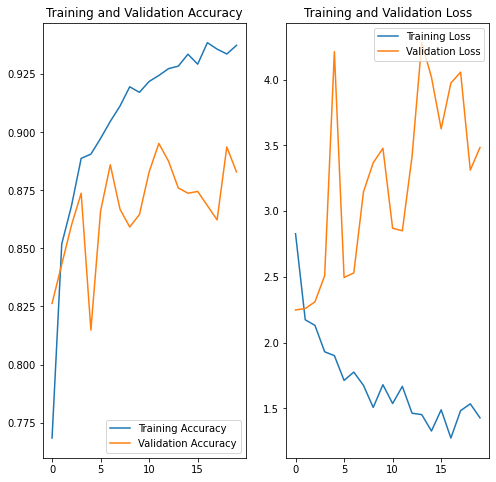

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()